In [1]:
! pip install biopython 

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\khush\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [9]:
from Bio import Entrez, SeqIO , AlignIO, Phylo
Entrez.email = "khushidriven@gmail.com"

accessions = {
    "Human": "NM_007294.4",
    "Mouse": "NM_009764.3",
    "Rat": "NM_001012183.1"
}

sequences = {}

for species, acc in accessions.items():
    handle = Entrez.efetch(db="nucleotide", id=acc, rettype="fasta", retmode="text")
    record = SeqIO.read(handle, "fasta")
    handle.close()
    sequences[species] = record.seq

sequences


{'Human': Seq('GCTGAGACTTCCTGGACGGGGGACAGGCTGTGGGGTTTCTCAGATAACTGGGCC...CCA'),
 'Mouse': Seq('GTTCCGAAAGGCTAGCGCTAGGCGCCAAGCGGCCGGTTTCCTTGGCGACGGAGA...ACA'),
 'Rat': Seq('GGCCGCCCATCTCTTTTCCTAAGGAACTTCTGGAGTTTAGGAGGTTTGATTCCT...AAA')}

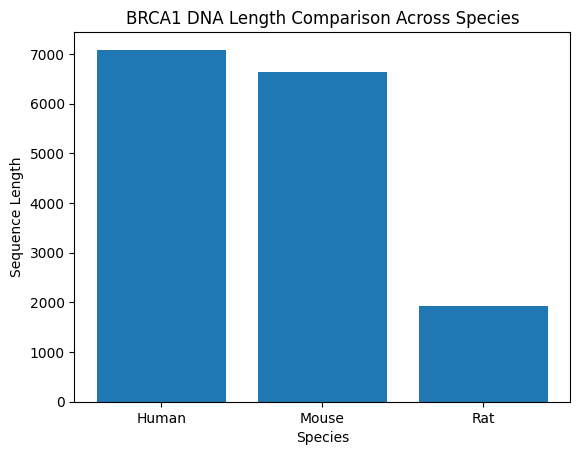

In [3]:
# Visualization of sequence length comparison of different species.
import pandas as pd 
import matplotlib.pyplot as plt 

lengths={sp: len(seq) for sp,seq in sequences.items()}
df=pd.DataFrame.from_dict(lengths, orient="index", columns=["Length"])

plt.bar(df.index,df["Length"])
plt.title("BRCA1 DNA Length Comparison Across Species")
plt.xlabel("Species")
plt.ylabel("Sequence Length")
plt.show()


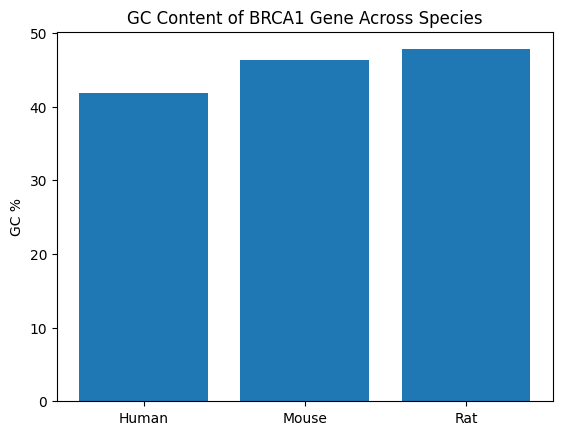

In [ ]:
# Visualization of GC content of BRCA1 of different species 
from Bio.SeqUtils import gc_fraction 

gc_content = {sp: gc_fraction(seq)*100 for sp, seq in sequences.items()}
gc_df = pd.DataFrame.from_dict(gc_content, orient="index", columns=["GC %"])

plt.bar(gc_df.index, gc_df["GC %"])
plt.title("GC Content of BRCA1 Gene Across Species")
plt.ylabel("GC %")
plt.show()


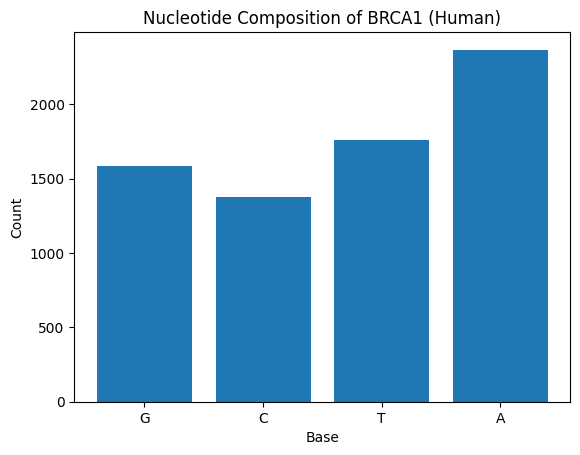

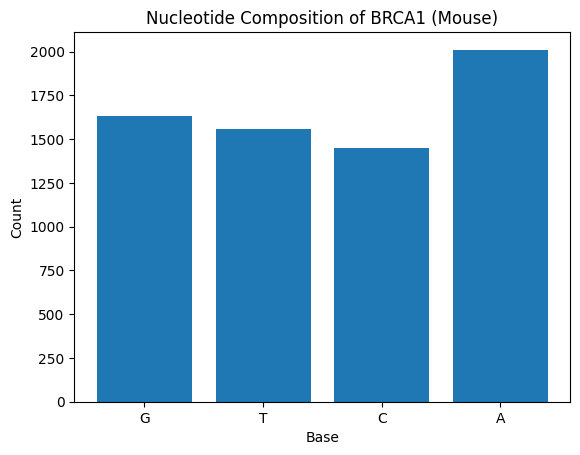

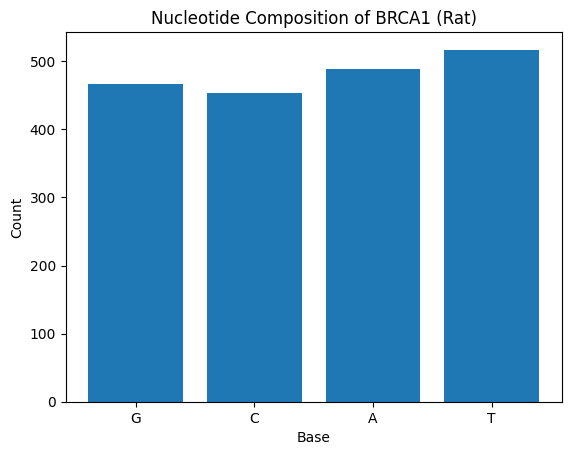

In [13]:
# Visualization Nucleotide Composition comparison of BRCA1 gene across different species
from collections import Counter 

for sp, seq in sequences.items():
    counts= Counter(str(seq))
    plt.figure()
    plt.bar(counts.keys(), counts.values())
    plt.title(f"Nucleotide Composition of BRCA1 ({sp})")
    plt.xlabel("Base")
    plt.ylabel("Count")
    plt.show()
